<a href="https://colab.research.google.com/github/pauhsainz/PRA3024/blob/main/ML_MNIST_NN_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# load training and test images (x), and their respective classified labels (y).
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)
First 10 training labels as digits:
 [5 0 4 1 9 2 1 3 1 4]



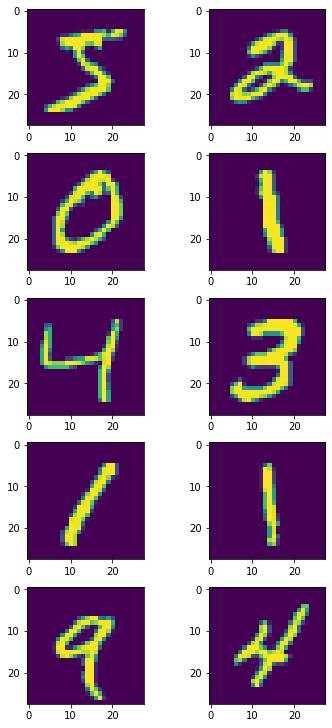

In [5]:
# Investigate the data

print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28
print("First 10 training labels as digits:\n", y_train[:10])
print("")

# Plot the first 10 images
### STUDENT CODE HERE ###
### --> Find a way to plot a sample of 10 images of hand-written digits in the training data
pic1, count1 = plt.subplots(5,2, figsize=(5, 10),constrained_layout=True)

pic_num = 0
for i in range(2):
    for j in range(5):
        count1[j][i].imshow(x_train[pic_no])
        pic_num += 1
### END STUDENT CODE ###

In [6]:
# Pre-processing of data

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)
print("reshaped training data format: ", x_train.shape) # -- 60000 images, now flat arrays of 28*28 long

# one-hot encode the labels
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 10 training lables as one-hot encoded vectors:\n", y_train[:10])

reshaped training data format:  (60000, 784)
First 10 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [7]:
# Build the network
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

model = Sequential()

# The input layer requires the special input_shape parameter, which should equal the shape of our training data.
# The output layer must be the same size as the (one-hot encoded) labels.
# Choose a non-linear activation function such as a sigmoid, or relu.
# For classification purposes, where the outputs are normalized 'probabilities' between the classes,
#  one typically uses the softmax activation function for the last layer.

### STUDENT CODE HERE ###
### --> add Dense (fully connected) layers to the model to connect input to output, using model.add().
###  Make sure that the dimensionality is correct: input should be # pixels large, 
###  output should be #classes large. Google is your friend.
### END STUDENT CODE ###
model.add(keras.layers.Dense(32, activation="sigmoid", input_shape=(28*28,)))
model.add(keras.layers.Dense(32, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))
# Print model summary. Shows network layout, and # free parameters (weights + biases) to adapt while learning.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the model

# A good loss function for probability classification that works well with softmax is the 'categorical crossentropy'.
#  It's a function of the difference between the predicted y (from running the image through the network),
#  and the actual label y that we get from the dataset. The larger the loss, the worst our network is performing.
# A good optimizer is the stochastic gradient descent (sgd) or adam.

### STUDENT CODE HERE ###
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
### END STUDENT CODE ###

Test loss: 2.44
Test accuracy: 0.0871


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


predicted: [1] ; real: [7]
predicted: [6] ; real: [2]
predicted: [6] ; real: [1]
predicted: [1] ; real: [0]
predicted: [1] ; real: [4]
predicted: [6] ; real: [1]
predicted: [1] ; real: [4]
predicted: [1] ; real: [9]
predicted: [1] ; real: [5]
predicted: [1] ; real: [9]


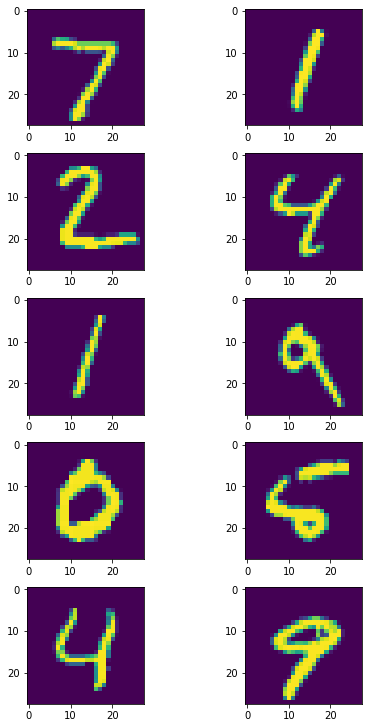

In [12]:
# Let's see how good the model 'predicts' some hand-written digits in our test dataset, without training.
# It's probably random: so for 10 digits, it should get an accuracy around 0.1 .

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

y_pred_test = model.predict_proba(x_test)

### STUDENT CODE HERE ###
### --> call model.predict_proba() on the test images, and show the predictions of the
###  untrained model for the first 10 images. Also, plot those images, as you did above.
for pred, real in zip(y_pred_test[:10], y_test[:10]):
    print("predicted: " + str(np.where(pred == max(pred))[0]) + " ; real: " + str(np.where(real == max(real))[0]))
    
pic2, count2 = plt.subplots(5,2, figsize=(5, 10),constrained_layout=True)

pic_num = 0
for i in range(2):
    for j in range(5):
       count2[j][i].imshow(x_test[pic_num].reshape(28,28))
       pic_num += 1
### END STUDENT CODE ###

In [13]:
# Train the model.

# BATCH_SIZE defines how many images to process at once.
# EPOCHS defines how often to run over the total data (60000 images)
# (Note that a small part of the train data is internally split off for independent validation of the metrics)

### STUDENT CODE HERE ###
### --> Edit the parameters below to obtain a better accuracy in the training.

BATCH_SIZE = 100
EPOCHS = 50

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_split=.1)

Epoch 1/50
540/540 [==============================] - 2s 2ms/step - loss: 2.1519 - accuracy: 0.3720 - val_loss: 1.9725 - val_accuracy: 0.6048
Epoch 2/50
540/540 [==============================] - 1s 2ms/step - loss: 1.8464 - accuracy: 0.6200 - val_loss: 1.6826 - val_accuracy: 0.6997
Epoch 3/50
540/540 [==============================] - 1s 2ms/step - loss: 1.5761 - accuracy: 0.7028 - val_loss: 1.4170 - val_accuracy: 0.7737
Epoch 4/50
540/540 [==============================] - 1s 2ms/step - loss: 1.3315 - accuracy: 0.7613 - val_loss: 1.1828 - val_accuracy: 0.8202
Epoch 5/50
540/540 [==============================] - 1s 2ms/step - loss: 1.1280 - accuracy: 0.8000 - val_loss: 0.9956 - val_accuracy: 0.8517
Epoch 6/50
540/540 [==============================] - 1s 2ms/step - loss: 0.9655 - accuracy: 0.8287 - val_loss: 0.8485 - val_accuracy: 0.8647
Epoch 7/50
540/540 [==============================] - 1s 2ms/step - loss: 0.8441 - accuracy: 0.8436 - val_loss: 0.7407 - val_accuracy: 0.8843
Epoch 

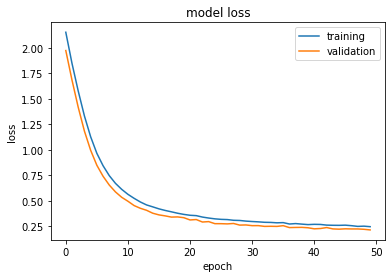

In [14]:
# Plot the progression of the training loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

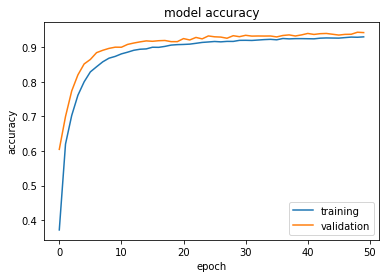

In [15]:
# Plot the progression of the training accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [16]:
# Evaluate model on test data - how often does the network predict the right label after training?

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# Make a confusion matrix to see which numbers are difficult to disentangle

y_pred_test = model.predict_proba(x_test) # obtain one-hot encoded predictions for the x_test images
y_test_index      = [ np.argmax(i) for i in y_test ] # actual number known labels
y_pred_test_index = [ np.argmax(i) for i in y_pred_test ] # actual number predictions
y_pred_test_proba = [ y_pred_test[i][ y_pred_test_index[i] ] for i in range(len(y_test_index)) ] # probabilities to be correct

from sklearn.metrics import confusion_matrix
### STUDENT CODE HERE ###
### --> Now predict again the labels for the test images, but after proper training.
###  Build a confusion matrix to show which labels we often confuse with what.
###  (Note that the y_test and y_pred are still one-hot encoded, so you need to get
###   the index of the maximum entry to find the corresponding predicted 'number'.
confusion_matrix(y_test_index, y_pred_test_index)
### END STUDENT CODE ###

Test loss: 0.246
Test accuracy: 0.93


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([[ 957,    0,    3,    1,    1,    7,    4,    4,    3,    0],
       [   0, 1112,    2,    6,    0,    3,    4,    4,    4,    0],
       [   9,    2,  960,    7,   14,    1,   15,    8,   15,    1],
       [   6,    2,   21,  920,    0,   29,    4,   10,   10,    8],
       [   2,    1,    3,    0,  917,    2,   12,    1,    4,   40],
       [  11,    3,    5,   33,    9,  790,   10,    3,   19,    9],
       [  18,    1,    7,    0,   14,   10,  904,    1,    3,    0],
       [   3,    8,   25,    5,    4,    0,    0,  954,    2,   27],
       [   5,    2,    7,   14,    7,   23,   13,   15,  872,   16],
       [   7,    3,    1,   10,   40,    8,    0,   15,    8,  917]])

predicted: [7] ; real: [7]
predicted: [2] ; real: [2]
predicted: [1] ; real: [1]
predicted: [0] ; real: [0]
predicted: [4] ; real: [4]
predicted: [1] ; real: [1]
predicted: [4] ; real: [4]
predicted: [9] ; real: [9]
predicted: [5] ; real: [5]
predicted: [9] ; real: [9]


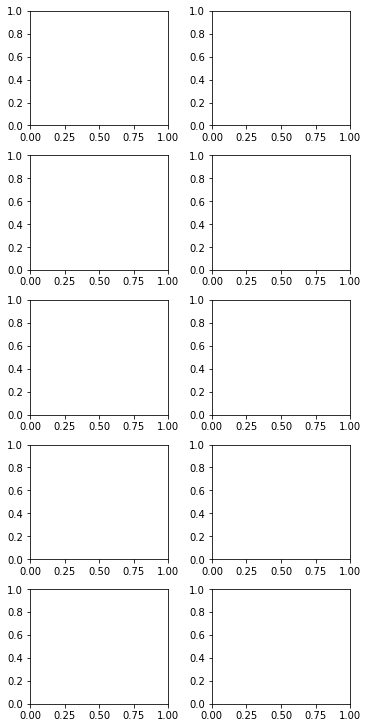

In [17]:
# Show some predicted labels and their probabilities to be correct

### STUDENT CODE HERE ###
### --> Now show some hand-written digit images from the test sample, 
###  their corresponding true label, their predicted label from your network,
###  and the probability associated with that prediction.
for pred, real in zip(y_pred_test[:10], y_test[:10]):
    print("predicted: " + str(np.where(pred == max(pred))[0]) + " ; real: " + str(np.where(real == max(real))[0]))
    

pic3, count3 = plt.subplots(5,2, figsize=(5, 10),constrained_layout=True)

pic_num = 0
for i in range(2):
    for j in range(5):
        ax1[j][i].imshow(x_test[pic_num].reshape(28,28))
        pic_num += 1
### END STUDENT CODE ###